### Cloning the repo

In [2]:
#!git clone https://github.com/akanametov/SuperResolution

In [3]:
#cd SuperResolution

### Import libraries

In [2]:
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


### Import models and helpers

In [4]:
from data.utils import DatasetSTL
#from data.utils import DatasetImageNet
from model import Generator, Discriminator
from utils import PixLoss, GeneratorLoss, DiscriminatorLoss

from trainer import Trainer 

### Define architectures and load pretrained `Generator`

In [ ]:
generator = Generator(in_channels=3, hid_channels=64, out_channels=3)
discriminator=Discriminator(in_channels=3, hid_channels=64, out_channels=1)

generator.load_state_dict(torch.load('model/generator_warmup.pt'))

### Define loss functions and optimizers
**Pretrained `vgg19` will be downloaded for Generator's loss!**

In [6]:
g_criterion = GeneratorLoss()
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)

d_criterion = DiscriminatorLoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)

### Downloading STL10 dataset
**You can also train it on `ImageNet`**

In [7]:
dataset = DatasetSTL(root='data', split='train', download=True)
dataloader = DataLoader(dataset, batch_size=16, pin_memory=True, shuffle=True)

Files already downloaded and verified


### Define `Trainer` and start

In [8]:
trainer = Trainer(generator, discriminator,
                 g_criterion, d_criterion,
                 g_optimizer, d_optimizer, device=device)

:::::::::::::::::  Epoch 100  :::::::::::::::::
::::::::::: Generator loss: 0.018 :::::::::::
::::::::: Discriminator loss: 0.313 :::::::::


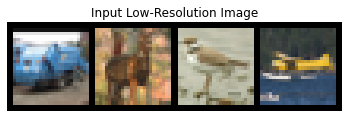

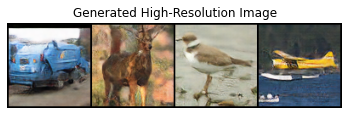

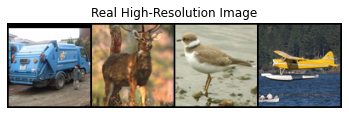

In [9]:
trainer.fit(dataloader, epochs=100, device=device)

### Save trained `Generator` and `Discriminator`

In [10]:
#torch.save(trainer.generator.state_dict(), 'generator.pt')
#torch.save(trainer.discriminator.state_dict(), 'discriminator.pt')

### Looking at losses

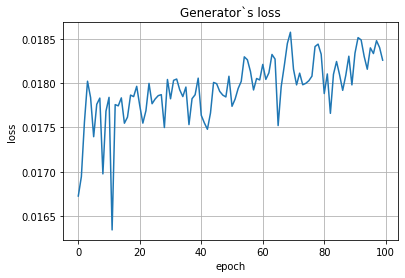

In [14]:
plt.title('Generator`s loss')
plt.plot(range(100), trainer.data['g_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.savefig('g_loss.png')

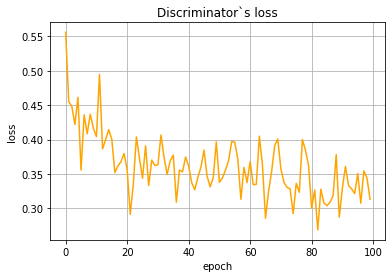

In [16]:
plt.title('Discriminator`s loss')
plt.plot(range(100), trainer.data['d_loss'], 'orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.savefig('d_loss.png')